In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
X = data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.0,male,1,0,7.2500,S
1,1,38.0,female,1,0,71.2833,C
2,3,26.0,female,0,0,7.9250,S
3,1,35.0,female,1,0,53.1000,S
4,3,35.0,male,0,0,8.0500,S


In [4]:
y = data[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [5]:
X.isnull().sum()

Pclass        0
Age         177
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
X[['Embarked']] = X[['Embarked']].fillna(value='S')
X[['Age']] = X[['Age']].fillna(value=np.float64(28.0))

/tmp/ipykernel_42925/159998314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Embarked']] = X[['Embarked']].fillna(value='S')
/tmp/ipykernel_42925/159998314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age']] = X[['Age']].fillna(value=np.float64(28.0))


In [7]:
X.isnull().sum()

Pclass      0
Age         0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex', 'Embarked'])

In [10]:
X = encoder.fit_transform(X)

In [11]:
X

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.0,1,1,0,7.2500,1
1,1,38.0,2,1,0,71.2833,2
2,3,26.0,2,0,0,7.9250,1
3,1,35.0,2,1,0,53.1000,1
4,3,35.0,1,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,27.0,1,0,0,13.0000,1
887,1,19.0,2,0,0,30.0000,1
888,3,28.0,2,1,2,23.4500,1
889,1,26.0,1,0,0,30.0000,2


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [13]:
X_train.shape, y_test.shape

((668, 7), (223, 1))

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
train_acc=[]
test_acc=[]
for k in range(50,200, 10):
    model = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=k)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

/home/vacant/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vacant/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vacant/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vacant/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [17]:
train_acc=np.array(train_acc)
test_acc=np.array(test_acc)

In [18]:
t=np.arange(50, 200, 10)

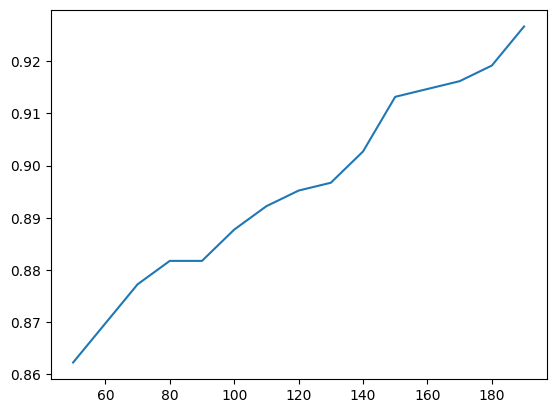

In [19]:
plt.plot(t, train_acc)

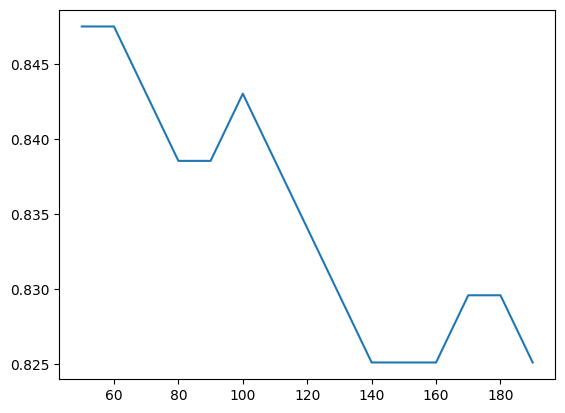

In [20]:
plt.plot(t, test_acc)

In [21]:
train_acc1=[]
test_acc1=[]
for k in range(2,12):
    model1 = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, max_depth=k)
    model1.fit(X_train, y_train)
    train_acc1.append(accuracy_score(y_train, model1.predict(X_train)))
    test_acc1.append(accuracy_score(y_test, model1.predict(X_test)))

/home/vacant/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vacant/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vacant/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vacant/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [22]:
train_acc1=np.array(train_acc1)
test_acc1=np.array(test_acc1)

In [23]:
t1=np.arange(2,12)

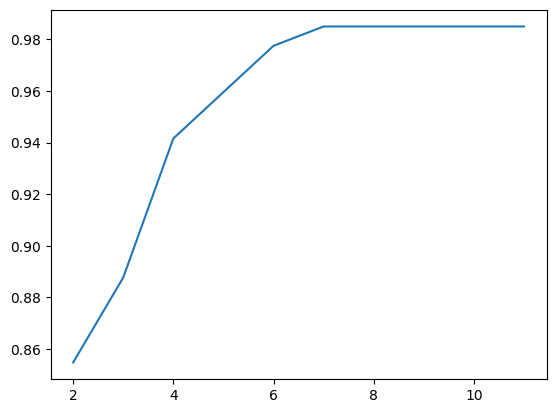

In [24]:
plt.plot(t1, train_acc1)

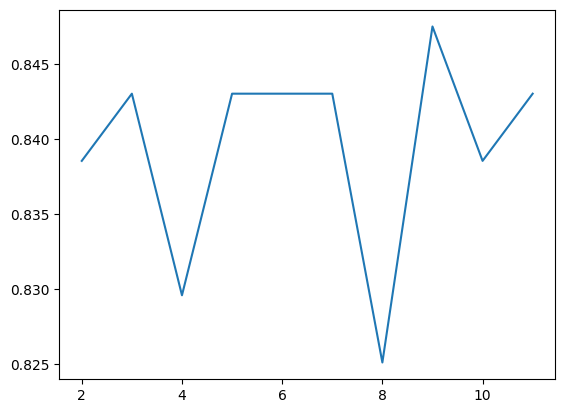

In [25]:
plt.plot(t1, test_acc1)